In [32]:
import io
import pandas as pd
df=pd.read_csv('C:\\Users\\User\Desktop\ML DL Projects\Dataset\Tweets\\train_tweets.csv')
df.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
import tensorflow as tf
from sklearn.svm import SVC

In [34]:
from functools import partial

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                29625 non-null  int64  
 1   tweet_user_id           29625 non-null  int64  
 2   tweet_created_at_year   29625 non-null  int64  
 3   tweet_created_at_month  29625 non-null  int64  
 4   tweet_created_at_day    29625 non-null  int64  
 5   tweet_created_at_hour   29625 non-null  int64  
 6   tweet_hashtag_count     29625 non-null  float64
 7   tweet_url_count         29625 non-null  float64
 8   tweet_mention_count     29625 non-null  float64
 9   tweet_has_attachment    29625 non-null  bool   
 10  tweet_attachment_class  29625 non-null  object 
 11  tweet_language_id       29625 non-null  int64  
 12  tweet_topic_ids         25340 non-null  object 
 13  virality                29625 non-null  int64  
dtypes: bool(1), float64(3), int64(8), obje

<AxesSubplot:>

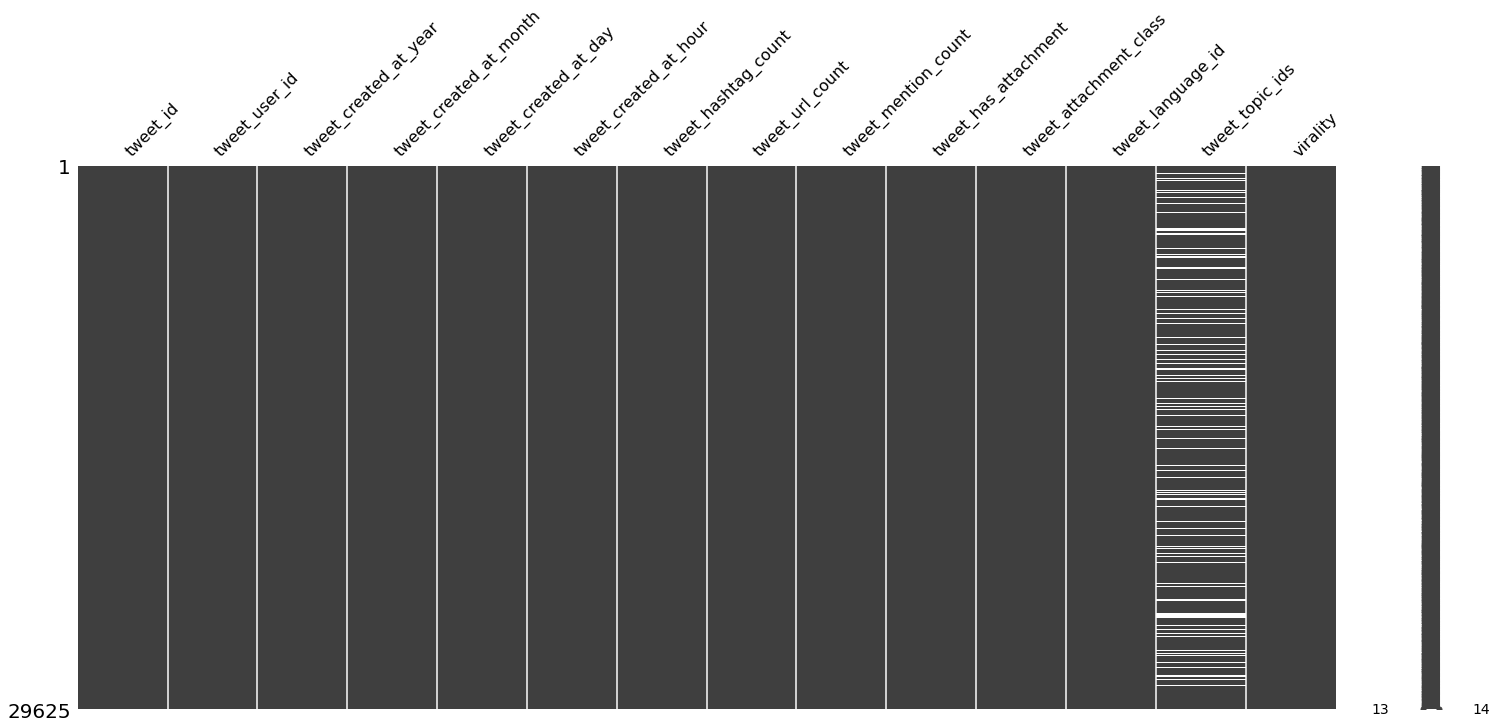

In [5]:
msno.matrix(df)

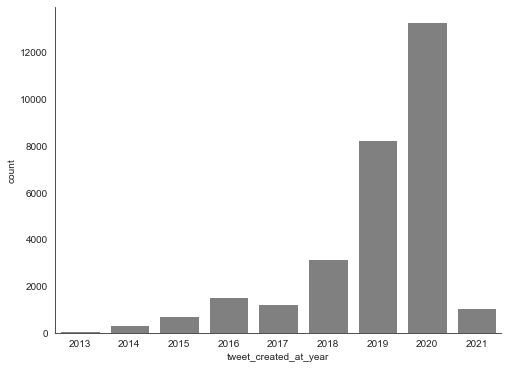

In [6]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.countplot(x=df.tweet_created_at_year,data=df,color='gray')
sns.despine()

In [7]:
years=[2013,2014,2015,2017,2018,2019,2020,2021]
month_df=pd.DataFrame()
print('Max Tweets Month for Each Year')
print('\n')
for year in years:
  df_year=df[df['tweet_created_at_year']==year]
  month=df_year['tweet_created_at_month'].value_counts().head(1)
  print(f'{year}'" "'Max_tweets')
  print(month,end="")
  print('\n')
  

Max Tweets Month for Each Year


2013 Max_tweets
12    37
Name: tweet_created_at_month, dtype: int64

2014 Max_tweets
4    51
Name: tweet_created_at_month, dtype: int64

2015 Max_tweets
12    147
Name: tweet_created_at_month, dtype: int64

2017 Max_tweets
9    146
Name: tweet_created_at_month, dtype: int64

2018 Max_tweets
12    429
Name: tweet_created_at_month, dtype: int64

2019 Max_tweets
12    1073
Name: tweet_created_at_month, dtype: int64

2020 Max_tweets
12    1536
Name: tweet_created_at_month, dtype: int64

2021 Max_tweets
1    1058
Name: tweet_created_at_month, dtype: int64



In [8]:
years=[2013,2014,2015,2017,2018,2019,2020,2021]
print('Max Tweets Day for Each Year')
print('\n')
for year in years:
  df_year=df[df['tweet_created_at_year']==year]
  day=df_year['tweet_created_at_day'].value_counts().head(1)
  print(f'{year}'" "'Max_tweets')
  print(day,end="")
  print('\n')

Max Tweets Day for Each Year


2013 Max_tweets
1    5
Name: tweet_created_at_day, dtype: int64

2014 Max_tweets
29    25
Name: tweet_created_at_day, dtype: int64

2015 Max_tweets
27    69
Name: tweet_created_at_day, dtype: int64

2017 Max_tweets
3    57
Name: tweet_created_at_day, dtype: int64

2018 Max_tweets
1    139
Name: tweet_created_at_day, dtype: int64

2019 Max_tweets
9    324
Name: tweet_created_at_day, dtype: int64

2020 Max_tweets
28    516
Name: tweet_created_at_day, dtype: int64

2021 Max_tweets
3    71
Name: tweet_created_at_day, dtype: int64



<AxesSubplot:>

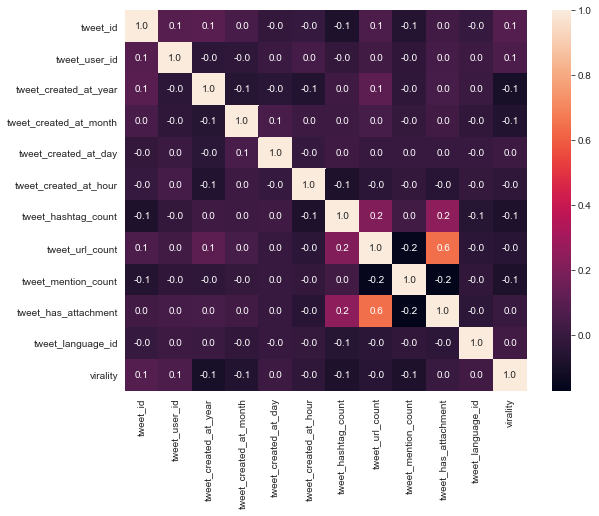

In [9]:
plt.figure(figsize=(9,7))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='0.1f')

In [35]:
X=df.drop(['tweet_language_id','virality','tweet_topic_ids'],axis=1)
y=df.virality

In [36]:
encode=LabelEncoder()
X['tweet_has_attachment']=encode.fit_transform(X['tweet_has_attachment'])
X['tweet_attachment_class']=encode.fit_transform(X['tweet_attachment_class'])

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.shape

(23700, 11)

In [16]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
preds=rf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80      2641
           2       0.57      0.54      0.55      1806
           3       0.55      0.53      0.54       965
           4       0.22      0.09      0.12       245
           5       0.55      0.41      0.47       268

    accuracy                           0.66      5925
   macro avg       0.53      0.48      0.50      5925
weighted avg       0.63      0.66      0.64      5925



In [17]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
preds=lgbm.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.74      0.89      0.81      2641
           2       0.58      0.50      0.54      1806
           3       0.57      0.56      0.56       965
           4       0.25      0.07      0.10       245
           5       0.53      0.44      0.48       268

    accuracy                           0.66      5925
   macro avg       0.54      0.49      0.50      5925
weighted avg       0.63      0.66      0.64      5925



In [8]:
def optimize(trial,x,y):
    
    iterations=trial.suggest_int('iterations',10,1000)
    max_depth=trial.suggest_int('max_depth',1,8)
    random_strength=trial.suggest_int('random_strength',1e-19,10)
    bagging_temperature=trial.suggest_uniform('bagging_temperature',0.0,1.0)
    l2_leaf_reg=trial.suggest_int('l2_leaf_reg',2,30)
    border_count=trial.suggest_int('border_count',1,255)
   
    model=CatBoostClassifier(
        iterations=iterations,
        max_depth=max_depth,
        random_strength=random_strength,
        bagging_temperature=bagging_temperature,
        l2_leaf_reg=l2_leaf_reg,
        border_count=border_count
    )
    kf=StratifiedKFold(n_splits=5)
    AC=[]
    for idx in kf.split(X=x,y=y):
        train_idx,test_idx=idx[0],idx[1]
        x_train,y_train=x[train_idx],y[train_idx]
        x_test,y_test=x[test_idx],y[test_idx]
       
        model.fit(x_train,y_train)
        preds=model.predict(x_test)
        fold_ac=accuracy_score(y_test,preds)
        AC.append(fold_ac)
        
    return -1*np.mean(AC)

In [24]:
import optuna
optimization_function=partial(optimize,x=X,y=y)
study=optuna.create_study(direction='minimize')

study.optimize(optimization_function,n_trials=15)

[I 2021-07-05 22:51:45,384] A new study created in memory with name: no-name-1b4c8555-191a-4b8c-b129-fe4cf2238707
[LightGBM] [Warning] Unknown parameter: border_count
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: random_strength
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: border_count
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: random_strength
[LightGBM] [Warning] Unknown parameter: bagging_temperature
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Unknown parameter: border_count
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown param

In [47]:
cb=CatBoostClassifier(
    iterations=2500,
    max_depth=7,
    num_leaves=128,
    od_type='IncToDec',
    early_stopping_rounds=100,
    bagging_temperature=0.3,
    random_strength=1.5,
    eval_metric='Accuracy',
    loss_function='MultiClass',
)
cb.fit(X_train,y_train,eval_set=(X_test,y_test),use_best_model=True)
pred=cb.predict(X_test)
accuracy_score(y_test,pred)

Learning rate set to 0.081061
0:	learn: 0.5039662	test: 0.4899578	best: 0.4899578 (0)	total: 15.2ms	remaining: 38s
1:	learn: 0.5233755	test: 0.5056540	best: 0.5056540 (1)	total: 45.1ms	remaining: 56.4s
2:	learn: 0.5169620	test: 0.4985654	best: 0.5056540 (1)	total: 53.1ms	remaining: 44.2s
3:	learn: 0.5205485	test: 0.4963713	best: 0.5056540 (1)	total: 78.5ms	remaining: 49s
4:	learn: 0.5351899	test: 0.5134177	best: 0.5134177 (4)	total: 98.7ms	remaining: 49.3s
5:	learn: 0.5466667	test: 0.5191561	best: 0.5191561 (5)	total: 119ms	remaining: 49.6s
6:	learn: 0.5556118	test: 0.5277637	best: 0.5277637 (6)	total: 141ms	remaining: 50.2s
7:	learn: 0.5660338	test: 0.5394093	best: 0.5394093 (7)	total: 163ms	remaining: 50.6s
8:	learn: 0.5650211	test: 0.5383966	best: 0.5394093 (7)	total: 184ms	remaining: 51s
9:	learn: 0.5655274	test: 0.5432911	best: 0.5432911 (9)	total: 210ms	remaining: 52.3s
10:	learn: 0.5735021	test: 0.5537553	best: 0.5537553 (10)	total: 235ms	remaining: 53.2s
11:	learn: 0.5775949	te

0.6705485232067511

In [ ]:
n,d=X_train.shape

In [48]:
test=pd.read_csv('C:\\Users\\User\Desktop\ML DL Projects\Dataset\Tweets\\test_tweets.csv')
test.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids
0,6238,13,2020,7,26,10,5.0,2.0,0.0,True,A,0,"['98', '99', '99', '99', '99', '78', '79', '80']"
1,37458,14,2018,1,15,18,0.0,0.0,1.0,False,C,0,"['78', '79', '80', '98']"
2,23968,50,2019,2,25,20,0.0,1.0,0.0,False,C,0,"['78', '79', '80']"
3,24137,50,2018,12,8,21,0.0,1.0,1.0,False,C,0,"['78', '79', '80']"
4,8064,30,2020,9,29,16,2.0,2.0,0.0,True,A,0,"['78', '79', '79', '80', '98', '99']"


In [49]:
test_new=test.drop(['tweet_language_id','tweet_topic_ids'],axis=1)
test_new['tweet_has_attachment']=encode.fit_transform(test_new['tweet_has_attachment'])
test_new['tweet_attachment_class']=encode.fit_transform(test_new['tweet_attachment_class'])

In [50]:
test['prediction']=cb.predict(test_new)
submission=pd.DataFrame({'tweet_id':test['tweet_id'],
                         'virality':test['prediction']})

In [51]:
submission.to_csv('ans21.csv',index=False)